# Query 6.1

Create a table/dataframe with the closing prices of 30 different stocks, with 10 from each of the caps

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame()
def insert_data(data):
    temp = pd.read_csv(data)
    temp_name = temp['Symbol'].iloc[0]
    df[temp_name] = temp['Close Price']
    return df
insert_data('Small Cap/ASHOKA.csv')
insert_data('Small Cap/BAJAJELEC.csv')
insert_data('Small Cap/BOMDYEING.csv')
insert_data('Small Cap/CENTURYPLY.csv')
insert_data('Small Cap/FORTIS.csv')
insert_data('Small Cap/GUJALKALI.csv')
insert_data('Small Cap/IDFC.csv')
insert_data('Small Cap/IRCON.csv')
insert_data('Small Cap/ITDC.csv')
insert_data('Small Cap/JETAIRWAYS.csv')
insert_data('Mid_Cap/ADANIPOWER.csv')
insert_data('Mid_Cap/AJANTPHARM.csv')
insert_data('Mid_Cap/AMARAJABAT.csv')
insert_data('Mid_Cap/APOLLOTYRE.csv')
insert_data('Mid_Cap/BERGEPAINT.csv')
insert_data('Mid_Cap/CASTROLIND.csv')
insert_data('Mid_Cap/CUMMINSIND.csv')
insert_data('Mid_Cap/DHFL.csv')
insert_data('Mid_Cap/EXIDEIND.csv')
insert_data('Mid_Cap/GMRINFRA.csv')
insert_data('Large_Cap/ADANIPORTS.csv')
insert_data('Large_Cap/ASIANPAINT.csv')
insert_data('Large_Cap/AXISBANK.csv')
insert_data('Large_Cap/BAJFINANCE.csv')
insert_data('Large_Cap/BPCL.csv')
insert_data('Large_Cap/CIPLA.csv')
insert_data('Large_Cap/DRREDDY.csv')
insert_data('Large_Cap/EICHERMOT.csv')
insert_data('Large_Cap/GAIL.csv')
insert_data('Large_Cap/HDFC.csv')
df.fillna(0,inplace=True)

# Query 6.2 

Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period

In [149]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
#print(returns)
returns.columns = ['Returns']
returns['Volatility'] = df.pct_change().std() *np.sqrt(252)

# Query 6.3 

Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method.

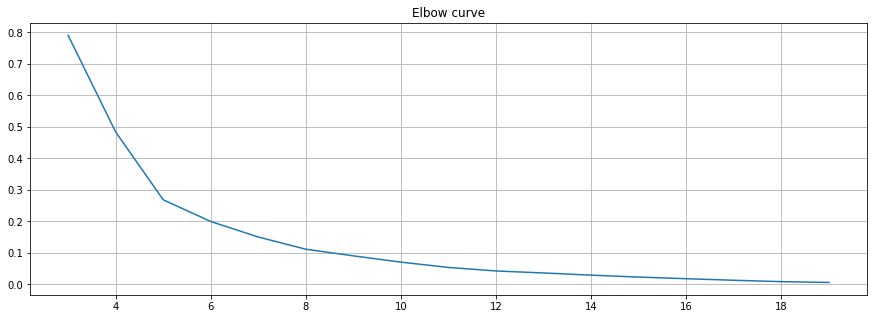

In [150]:
#Had to remove Outliers as it will hinder the clustering in upcoming query 
returns.drop('HDFC',inplace=True)
returns.drop('DHFL',inplace=True)
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
cleaned_data = np.where(np.isnan(data), 0, data)
#cleaned_data
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
X = cleaned_data
#within cluster sum of squares.we calculate the sum of squares of the distance of each data point 
# in cluster k from their center point ki.
wcss = []
for k in range(3, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(3, 20), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

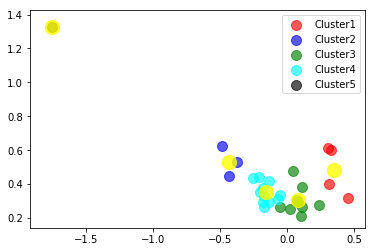

In [151]:
#The clusters taken is 5 from the above Elbow curve method
# computing K-Means
centroids,_ = kmeans(cleaned_data,5)
# assign each sample to a cluster
idx,_ = vq(cleaned_data,centroids)
data = cleaned_data

#using scatter plt 
plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
plt.scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.65)
#plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='yellow')
plt.scatter(centroids[:,0],centroids[:,1],s=200, c='yellow', alpha = 0.8)
plt.legend()
plt.show()

# Query 6.4 

Prepare a separate Data frame to show which stocks belong to the same cluster. 

In [152]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
labels =['Stock Symbol', 'Cluster']
df = pd.DataFrame.from_records(details, columns=labels)
df.head(n=28)

,Stock Symbol,Cluster
0,ASHOKA,3
1,BAJAJELEC,0
2,BOMDYEING,0
3,CENTURYPLY,3
4,FORTIS,3
5,GUJALKALI,2
6,IDFC,3
7,IRCON,4
8,ITDC,1
9,JETAIRWAYS,1
